In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [189]:
df = pd.read_csv('titanic_dataset.csv')

# Data Exploration and Preprocessing


In [190]:
# view dimensions of dataset

df.shape

(891, 12)

In [191]:
# preview the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
col_names = [
    'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
    'Ticket', 'Fare', 'Cabin', 'Embarked']


df.columns = col_names

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [193]:

# Check for missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [194]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [195]:

# Check for missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [196]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [197]:

# Check for missing values
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [198]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [199]:

# Check for missing values
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [200]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Explore categorical variables

In [201]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [144]:
# view the categorical variables

df[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


In [202]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(df[var].value_counts())

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36            

In [203]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [204]:
df[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


In [205]:

# View summary of the dataset
print("\nSummary of the dataset:")
print(df.info())



Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [206]:

# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('\nThere are {} numerical variables'.format(len(numerical)))
print('The numerical variables are:', numerical)



There are 7 numerical variables
The numerical variables are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [207]:

# View the numerical variables
print("\nTop 5 rows of numerical variables:")
print(df[numerical].head())


Top 5 rows of numerical variables:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [208]:

# Frequency counts of categorical variables
print("\nFrequency counts of categorical variables:")
for var in categorical:
    print(df[var].value_counts())


Frequency counts of categorical variables:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7       

In [209]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [210]:
# Convert 'Sex' and 'Embarked' columns to categorical type if they are not already
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# View the dataset after encoding
print("\nDataset after one-hot encoding:")
print(df_encoded.head())

# Check for any remaining missing values
print("\nMissing values in the dataset after encoding:")
print(df_encoded.isnull().sum())



Dataset after one-hot encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare    Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  B96 B98      True       False        True  
1          PC 17599  71.2833      C85     False       False       False  
2  STON/O2. 3101282   7.9250  B96 B98     False       False        True

In [211]:

# Convert categorical features into numerical ones using one-hot encoding
categorical_features = ['Sex', 'Embarked', 'Pclass']
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']


In [212]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [213]:
# I'll split the dataset into train and test sets
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=123)



In [214]:
# Select features for the model
X_train = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y_train = train_data['Survived']
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y_test = test_data['Survived']

In [216]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['Sex', 'Embarked']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)

gnb.fit(X_train_encoded, y_train)


GaussianNB()

In [217]:

X_test_encoded = preprocessor.transform(X_test)

y_pred = gnb.predict(X_test_encoded)

y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [218]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7500


In [219]:

X_train_encoded = preprocessor.transform(X_train)

y_pred_train = gnb.predict(X_train_encoded)



In [220]:
# Inspect the transformed training data
print(X_train_encoded[:5])  # Print the first 5 rows
print(X_train_encoded.shape)  # Print the shape of the transformed data


[[ 1.      0.      0.      0.      1.      2.      4.      1.      1.
  23.    ]
 [ 0.      1.      0.      1.      0.      3.     28.      0.      0.
   6.8583]
 [ 0.      1.      0.      0.      1.      3.     29.      0.      0.
   9.5   ]
 [ 0.      1.      0.      0.      1.      3.     33.      0.      0.
   7.8958]
 [ 1.      0.      0.      0.      1.      3.     17.      4.      2.
   7.925 ]]
(94, 10)


In [221]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[14  1]
 [ 5  4]]

True Positives(TP) =  14

True Negatives(TN) =  4

False Positives(FP) =  1

False Negatives(FN) =  5


<Axes: >

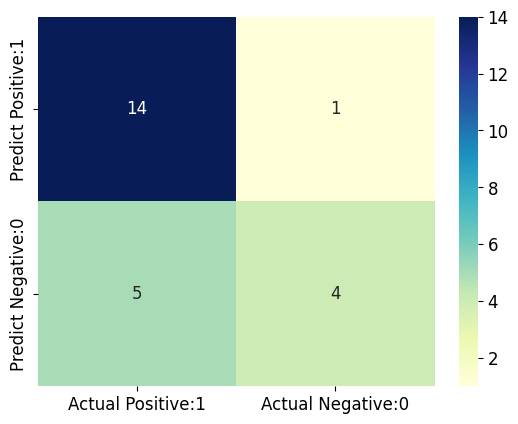

In [222]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [223]:
# Transform test data using the preprocessor object
X_test_encoded = preprocessor.transform(X_test)

# Make predictions on the test data and obtain predicted probabilities
y_pred_prob = gnb.predict_proba(X_test_encoded)[:10]

# Print the first 10 predicted probabilities for classes 0 and 1
print("First 10 predicted probabilities for classes 0 and 1:")
print(y_pred_prob)


First 10 predicted probabilities for classes 0 and 1:
[[1.00760203e-21 1.00000000e+00]
 [1.35846630e-04 9.99864153e-01]
 [9.75709207e-01 2.42907926e-02]
 [4.50193810e-06 9.99995498e-01]
 [9.98253416e-01 1.74658358e-03]
 [9.98891903e-01 1.10809735e-03]
 [9.92167282e-01 7.83271842e-03]
 [9.51844737e-01 4.81552630e-02]
 [9.19674028e-01 8.03259725e-02]
 [9.99041542e-01 9.58457814e-04]]


In [224]:
# store the probabilities in dataframe
# Transform test data using the preprocessor object
X_test_encoded = preprocessor.transform(X_test)

# Make predictions on the test data and obtain predicted probabilities
y_pred_prob_df = gnb.predict_proba(X_test_encoded)[:10]

y_pred_prob_df

array([[1.00760203e-21, 1.00000000e+00],
       [1.35846630e-04, 9.99864153e-01],
       [9.75709207e-01, 2.42907926e-02],
       [4.50193810e-06, 9.99995498e-01],
       [9.98253416e-01, 1.74658358e-03],
       [9.98891903e-01, 1.10809735e-03],
       [9.92167282e-01, 7.83271842e-03],
       [9.51844737e-01, 4.81552630e-02],
       [9.19674028e-01, 8.03259725e-02],
       [9.99041542e-01, 9.58457814e-04]])

In [225]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test_encoded)[:, 1]

Text(0, 0.5, 'Frequency')

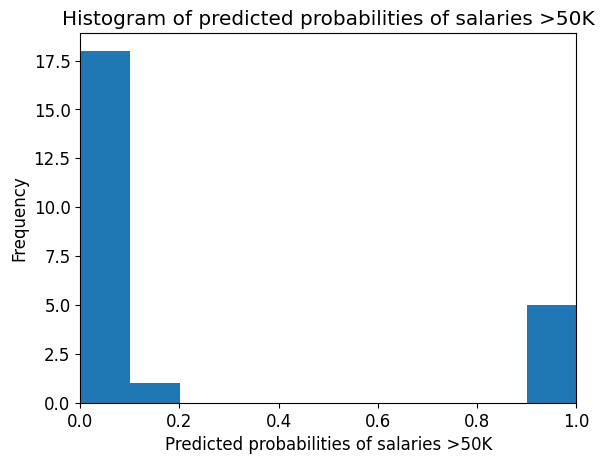

In [226]:
# plot histogram of predicted probabilities

import matplotlib.pyplot as plt


plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read the dataset
df = pd.read_csv('titanic_dataset.csv')

# Define the features and target variable
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']

# Define the preprocessing steps
categorical_cols = ['Sex', 'Embarked']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gnb)])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy score
print("Mean accuracy score:", np.mean(cv_scores))


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 428, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
